In [1]:
import os
import json
import numpy as np
import splitfolders
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [2]:
dataset = tf.keras.utils.image_dataset_from_directory('MaizeLeafDataset',
                                                  batch_size=32,
                                                  image_size=(256, 256),
                                                  shuffle=True,
                                                  )

Found 8852 files belonging to 5 classes.


In [3]:
class_names = dataset.class_names
class_names

['Common Rust',
 'Gray Leaf Spot',
 'Healthy',
 'Northern Leaf Blight',
 'Not Maize Leaf']

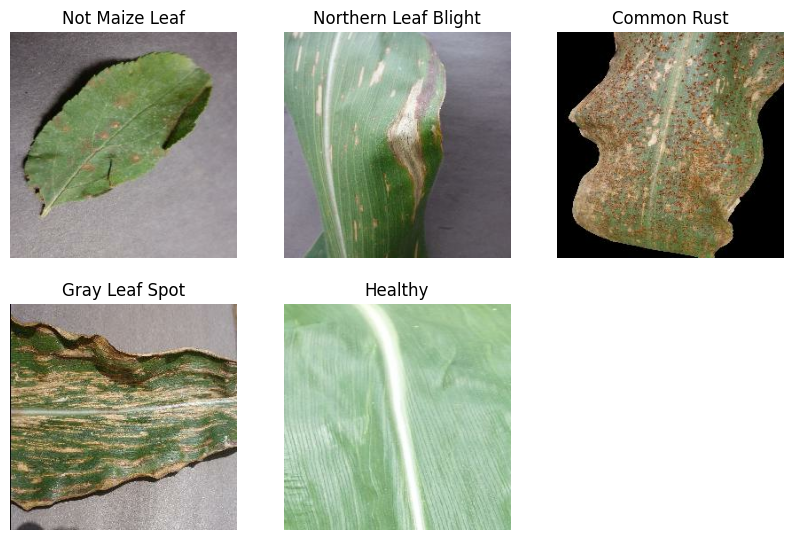

In [4]:
plt.figure(figsize=(10, 10))
class_counts = {class_name: 0 for class_name in class_names} 
display_limit = 1  
for img_batch, label_batch in dataset.take(6): 
    for i in range(len(img_batch)):
        class_name = class_names[label_batch[i]]
        if class_counts[class_name] < display_limit:
            ax = plt.subplot(3, 3, sum(class_counts.values()) + 1)
            plt.imshow(img_batch[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
            class_counts[class_name] += 1
        if sum(class_counts.values()) >= len(class_names):
            break
    if sum(class_counts.values()) >= len(class_names):
        break
plt.show()

In [5]:
dir1 = 'MaizeLeafDataset'
dir2 = 'MaizeLeafDataset2'
os.listdir(dir2)

[]

In [6]:
splitfolders.ratio(dir1, 
                  output=dir2,
                  seed=27,
                  ratio=(0.8, 0.1, 0.1),
                  group_prefix=None)

In [7]:
train_path = dir2+'\\train\\'
test_path = dir2+'\\test\\'
validation_path = dir2+'\\val\\'

In [8]:
image_gen = ImageDataGenerator(rotation_range=10, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1.0/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [9]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(256, 256),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='sparse'
                                               )

Found 7079 images belonging to 5 classes.


In [10]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(256, 256),
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='sparse')

Found 891 images belonging to 5 classes.


In [11]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                                     target_size=(256, 256),
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     class_mode='sparse')

Found 882 images belonging to 5 classes.


In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
   
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
   
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
    
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

C:\Users\farma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,221 (614.14 KB)

 Trainable params: 157,221 (614.14 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

In [15]:
hist = model.fit(train_image_gen,
                 epochs=50,
                 validation_data=validation_image_gen,
                 batch_size=32,
                 verbose=1
                )

C:\Users\farma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5217 - loss: 1.0890  

C:\Users\farma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.5225 - loss: 1.0873 - val_accuracy: 0.8946 - val_loss: 0.2818
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.8931 - loss: 0.2847 - val_accuracy: 0.9218 - val_loss: 0.2164
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.9029 - loss: 0.2605 - val_accuracy: 0.8821 - val_loss: 0.2850
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.9189 - loss: 0.2021 - val_accuracy: 0.9297 - val_loss: 0.1850
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.9387 - loss: 0.1631 - val_accuracy: 0.9150 - val_loss: 0.2226
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9407 - loss: 0.1466 - val_accuracy: 0.9626 - val_loss: 0.1461
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9491 - loss: 0.1402 - val_accuracy: 0.9705 - val_loss: 0.1100
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9495 - loss: 0.1290 - val_accuracy: 0.967

In [16]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

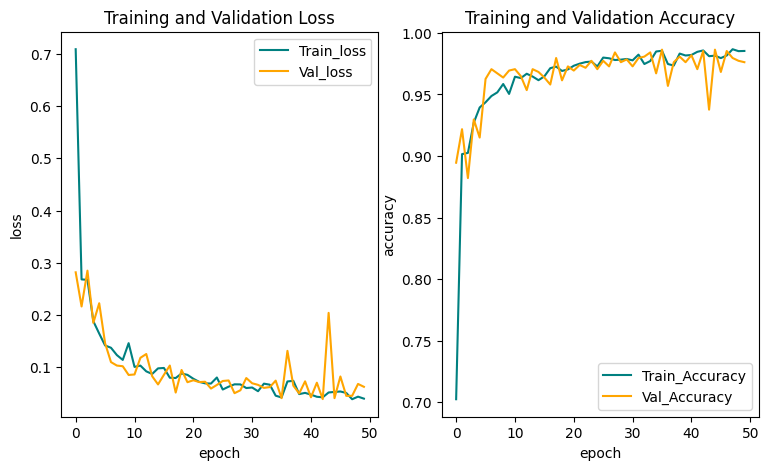

In [17]:
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], color='teal', label='Train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='Val_loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], color='teal', label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Val_Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()

plt.show()

In [18]:
test_loss, test_acc=model.evaluate(test_image_gen)
print('Test Accuracy:', test_acc*100)
print('Test Loss:', test_loss*100)

28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 680ms/step - accuracy: 0.9754 - loss: 0.0638
Test Accuracy: 97.19416499137878
Test Loss: 6.762447208166122


In [19]:
class_indices = {v: k for k, v in train_image_gen.class_indices.items()}
class_indices

{0: 'Common Rust',
 1: 'Gray Leaf Spot',
 2: 'Healthy',
 3: 'Northern Leaf Blight',
 4: 'Not Maize Leaf'}

In [20]:
json.dump(class_indices, open('class_indices.json', 'w'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


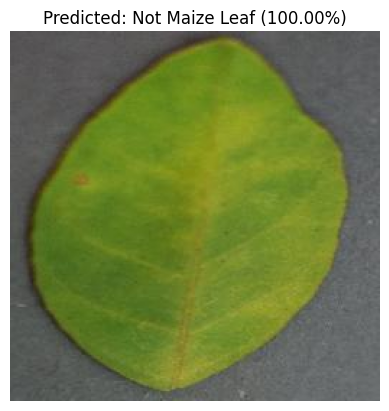

Predicted Label: Not Maize Leaf
Confidence: 100.00%


In [22]:
def classify_single_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))  
    img_array = np.array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0]) * 100  
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()
    print(f"Predicted Label: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")
image_path = 'MaizeLeafDataset/Not Maize Leaf/NotMaizeLeaf (8).JPG' 
classify_single_image(image_path)

In [23]:
model.save('maize-leaf-disease-model-1.h5')